In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (16, 12)

## MPG Data
### Use *mpg.csv* to complete the following exercise:

In [3]:
data = pd.read_csv("data/mpg.csv")

In [29]:
mean_displ = data.groupby("class").mean()['displ'].reset_index()

In [284]:
def get_mean_displ(cls):
    """ Use global mean_displ DataFrame """
    return mean_displ[mean_displ['class'] == cls]['displ'].values[0]

In [35]:
data = data.assign(mean_displ=data['class'].apply(get_mean_displ))

#### Graph fuel efficiency vs engine size for all cars in the dataset, faceted by the class of automobile. 

#### Add annotations for the following:
- The cars with the best/worst hwy efficiency
- The cars with the best/worst city efficiency

In [283]:
#Cars with the best highway and city efficiency
max_hwy = data[data.hwy == max(data.hwy)]
max_cty = data[data.cty == max(data.cty)]

#Cars with the worst highway and city efficiency
min_hwy = data[data.hwy == min(data.hwy)]
min_cty = data[data.cty == min(data.cty)]

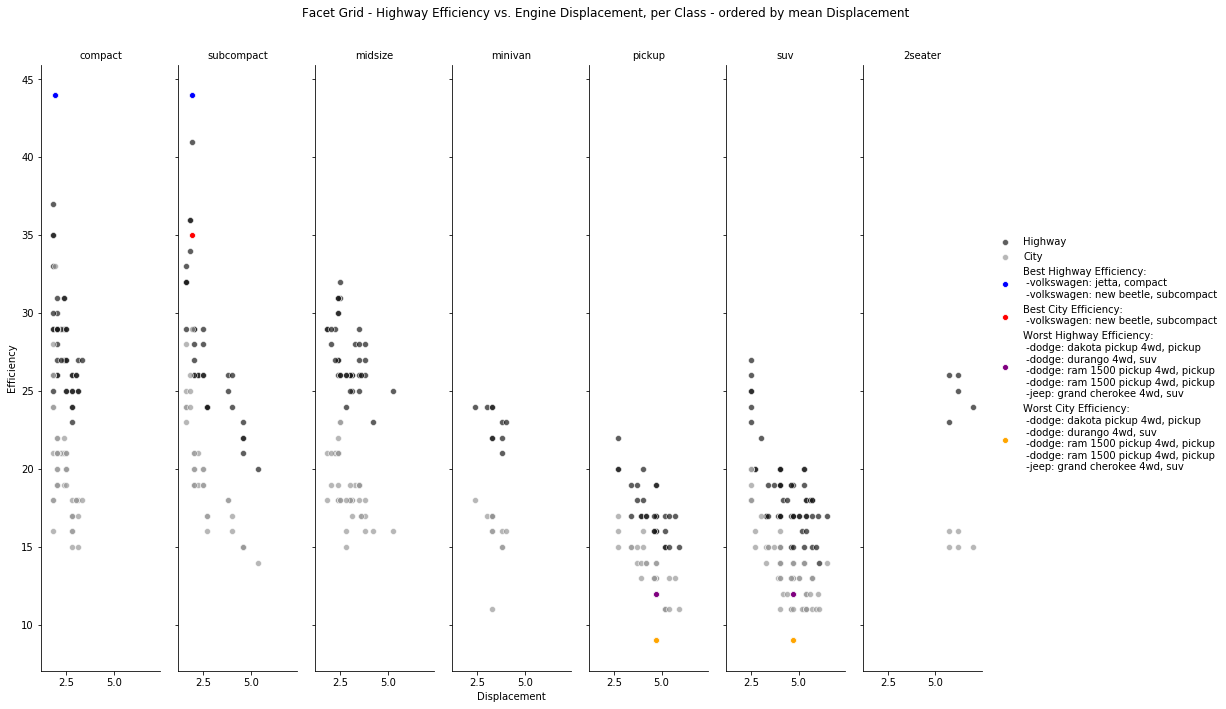

In [291]:
g = sns.FacetGrid(data=data, col="class", height=10, aspect=0.2,
                  col_order=mean_displ.sort_values("displ", ascending=True)['class'])

def f_hwy_max(x, y, **kwargs):
    kwargs['color'] = 'blue'
    filter_f(max_hwy, 'hwy')(x,y,**kwargs)

def f_cty_max(x, y, **kwargs):
    kwargs['color'] = 'red'
    filter_f(max_cty, 'cty')(x,y,**kwargs) 
    
def f_hwy_min(x, y, **kwargs):
    kwargs['color'] = 'purple'
    filter_f(min_hwy, 'hwy')(x,y,**kwargs)

def f_cty_min(x, y, **kwargs):
    kwargs['color'] = 'orange'
    filter_f(min_cty, 'cty')(x,y,**kwargs) 

def filter_f(data, col):
    """ Create generic plotter - expecting 'data' to have 'manufacturer', 'model', and 'class' columns"""
    def plotter(x, y, **kwargs):
        check_y = list(filter(lambda xy: xy[1] in data[col].values, zip(x,y)))          
        if len(check_y) > 0:
            # https://stackoverflow.com/questions/12974474/how-to-unzip-a-list-of-tuples-into-individual-lists
            x, y = zip(*check_y)
            
            label = kwargs.get('label')
            if kwargs.get('label') is not None:
                labels = [" -{}: {}, {}".format(car.manufacturer, 
                                                car.model, 
                                                car['class']) for _,car in data.iterrows()]
                label += "{}".format(", ".join(labels))
                kwargs['label'] += ":\n{}".format("\n".join(labels))
            sns.scatterplot(x, y, **kwargs) 
    
    return plotter    

g.map(sns.scatterplot, "displ", "hwy", alpha=0.7, color="0.1", label="Highway")
g.map(sns.scatterplot, "displ", "cty", alpha=0.7, color="0.6", label="City")
g.map(f_hwy_max, "displ", "hwy", label="Best Highway Efficiency")
g.map(f_cty_max, "displ", "cty", label="Best City Efficiency")
g.map(f_hwy_min, "displ", "hwy", label="Worst Highway Efficiency")
g.map(f_cty_min, "displ", "cty", label="Worst City Efficiency")

g.add_legend()
g.set_titles("{col_name}")
g.set_ylabels("Efficiency")
g.set_xlabels("")
g.axes[0][int(len(mean_displ)/2)].set_xlabel("Displacement")

plt.subplots_adjust(top=0.9)
_ = g.fig.suptitle(
"Facet Grid - Highway Efficiency vs. Engine Displacement\
, per Class - ordered by mean Displacement")

None

---